In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("ICU_Challenge_Dataset.csv")

df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,...,Platelets_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
0,132539,6,1,0,54.0,0.0,NaN,NaN,0,0,...,185.0,NaN,NaN,9.4,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,0,76.0,1.0,175.3,76.0,0,1,...,135.0,NaN,NaN,13.3,81.6,7.37,71.0,360.0,0.0,5.0
2,132541,21,11,0,44.0,0.0,NaN,56.7,0,0,...,113.0,NaN,NaN,6.2,56.7,7.47,617.0,2160.0,1.0,14.0
3,132543,7,1,0,68.0,1.0,180.3,84.6,0,0,...,284.0,NaN,NaN,7.9,84.6,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,0,88.0,0.0,NaN,NaN,0,0,...,97.0,NaN,NaN,4.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,1.0,NaN,80.0,0,0,...,221.0,NaN,NaN,11.5,NaN,7.46,238.0,2440.0,1.0,17.0
5996,151383,13,2,0,90.0,0.0,157.5,72.0,1,0,...,305.0,NaN,NaN,12.1,68.5,NaN,NaN,NaN,NaN,NaN
5997,149623,12,9,0,72.0,0.0,NaN,185.0,1,0,...,167.0,NaN,0.02,12.7,NaN,7.39,188.0,1200.0,0.0,10.0
5998,145366,18,11,1,52.0,1.0,182.9,95.9,0,0,...,28.0,NaN,NaN,5.8,96.2,7.36,100.0,2760.0,1.0,27.0


In [2]:
df.isnull().sum() # I check the missing values

recordid                0
SAPS-I                  0
SOFA                    0
In-hospital_death       0
Age                     0
                     ... 
pH_last              1478
MechVentStartTime    2256
MechVentDuration     2256
MechVentLast8Hour    2256
UrineOutputSum       2256
Length: 121, dtype: int64

In [3]:
#print name of parameters considered

list(df.columns)


['recordid',
 'SAPS-I',
 'SOFA',
 'In-hospital_death',
 'Age',
 'Gender',
 'Height',
 'Weight',
 'CCU',
 'CSRU',
 'SICU',
 'DiasABP_first',
 'GCS_first',
 'Glucose_first',
 'HR_first',
 'MAP_first',
 'NIDiasABP_first',
 'NIMAP_first',
 'NISysABP_first',
 'RespRate_first',
 'SaO2_first',
 'SysABP_first',
 'Temp_first',
 'DiasABP_last',
 'GCS_last',
 'Glucose_last',
 'HR_last',
 'MAP_last',
 'NIDiasABP_last',
 'NIMAP_last',
 'NISysABP_last',
 'RespRate_last',
 'SaO2_last',
 'SysABP_last',
 'Temp_last',
 'DiasABP_lowest',
 'GCS_lowest',
 'Glucose_lowest',
 'HR_lowest',
 'MAP_lowest',
 'NIDiasABP_lowest',
 'NIMAP_lowest',
 'NISysABP_lowest',
 'RespRate_lowest',
 'SaO2_lowest',
 'SysABP_lowest',
 'Temp_lowest',
 'DiasABP_highest',
 'GCS_highest',
 'Glucose_highest',
 'HR_highest',
 'MAP_highest',
 'NIDiasABP_highest',
 'NIMAP_highest',
 'NISysABP_highest',
 'RespRate_highest',
 'SaO2_highest',
 'SysABP_highest',
 'Temp_highest',
 'DiasABP_median',
 'GCS_median',
 'Glucose_median',
 'HR_medi

In [4]:
#I can look at the histograms
#df.hist(figsize=(100,100))

In [5]:
#check dimension
len(df)

6000

In [6]:
#I consider only dead patients
df_dead = df.loc[df['In-hospital_death']==1]
df_dead

,recordid,SAPS-I,SOFA,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,...,Platelets_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
7,132551,19,8,1,78.0,0.0,162.6,48.4,0,0,...,102.0,3.1,NaN,23.5,48.4,7.37,1090.0,1710.0,1.0,12.0
20,132588,-1,7,1,48.0,0.0,154.9,42.3,0,0,...,130.0,NaN,NaN,6.5,NaN,NaN,NaN,NaN,NaN,NaN
26,132598,22,5,1,80.0,0.0,NaN,60.0,0,0,...,185.0,NaN,NaN,20.2,NaN,7.48,74.0,2675.0,1.0,18.0
29,132602,13,1,1,80.0,1.0,180.3,70.0,0,0,...,309.0,NaN,NaN,14.1,NaN,7.53,2859.0,0.0,1.0,1.0
30,132605,21,9,1,90.0,0.0,NaN,55.0,0,0,...,327.0,NaN,NaN,10.0,NaN,7.39,67.0,2735.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,147018,23,13,1,68.0,1.0,182.9,97.0,1,0,...,286.0,NaN,0.17,13.9,NaN,7.44,179.0,2610.0,1.0,14.0
5981,145436,13,13,1,81.0,0.0,NaN,60.0,0,0,...,70.0,NaN,NaN,5.6,65.1,7.37,82.0,2592.0,1.0,16.0
5987,148889,16,11,1,90.0,0.0,144.8,49.3,0,1,...,98.0,NaN,NaN,8.3,49.3,7.39,39.0,2640.0,1.0,14.0
5995,151939,19,6,1,52.0,1.0,NaN,80.0,0,0,...,221.0,NaN,NaN,11.5,NaN,7.46,238.0,2440.0,1.0,17.0


In [7]:
#I plot just the "last" parameters of all the dead patients
df_dead_last = df_dead[['DiasABP_last',
         'GCS_last',
         'Glucose_last',
         'HR_last',
         'MAP_last',
         'NIDiasABP_last',
         'NIMAP_last',
         'NISysABP_last',
         'RespRate_last',
         'SaO2_last',
         'SysABP_last',
         'Temp_last','ALP_last',
         'ALT_last',
         'AST_last',
         'Albumin_last',
         'BUN_last',
         'Bilirubin_last',
         'Cholesterol_last',
         'Creatinine_last',
         'FiO2_last',
         'HCO3_last',
         'HCT_last',
         'K_last',
         'Lactate_last',
         'Mg_last',
         'Na_last',
         'PaCO2_last',
         'PaO2_last',
         'Platelets_last',
         'TroponinI_last',
         'TroponinT_last',
         'WBC_last',
         'Weight_last',
         'pH_last',]]
df_dead_last

,DiasABP_last,GCS_last,Glucose_last,HR_last,MAP_last,NIDiasABP_last,NIMAP_last,NISysABP_last,RespRate_last,SaO2_last,...,Mg_last,Na_last,PaCO2_last,PaO2_last,Platelets_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last
7,35.0,9.0,116.0,58.0,61.0,19.0,49.67,111.0,NaN,96.0,...,1.6,137.0,24.0,94.0,102.0,3.1,NaN,23.5,48.4,7.37
20,NaN,15.0,110.0,78.0,NaN,46.0,59.67,87.0,9.0,NaN,...,1.3,133.0,NaN,NaN,130.0,NaN,NaN,6.5,NaN,NaN
26,64.0,8.0,129.0,72.0,95.0,61.0,82.33,125.0,NaN,99.0,...,2.2,146.0,29.0,126.0,185.0,NaN,NaN,20.2,NaN,7.48
29,NaN,15.0,106.0,85.0,NaN,61.0,83.00,144.0,NaN,NaN,...,2.3,137.0,35.0,61.0,309.0,NaN,NaN,14.1,NaN,7.53
30,NaN,7.0,120.0,98.0,NaN,72.0,91.00,129.0,NaN,NaN,...,1.7,137.0,43.0,91.0,327.0,NaN,NaN,10.0,NaN,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,52.0,11.0,107.0,61.0,69.0,49.0,67.00,103.0,NaN,97.0,...,2.4,141.0,42.0,124.0,286.0,NaN,0.17,13.9,NaN,7.44
5981,47.0,6.0,175.0,76.0,66.0,NaN,NaN,NaN,NaN,98.0,...,1.8,143.0,25.0,152.0,70.0,NaN,NaN,5.6,65.1,7.37
5987,46.0,6.0,164.0,130.0,68.0,NaN,NaN,NaN,NaN,98.0,...,2.9,140.0,33.0,146.0,98.0,NaN,NaN,8.3,49.3,7.39
5995,49.0,5.0,118.0,104.0,65.0,NaN,NaN,NaN,NaN,99.0,...,2.0,140.0,32.0,119.0,221.0,NaN,NaN,11.5,NaN,7.46


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000181065BA9D0>,
      dtype=object)

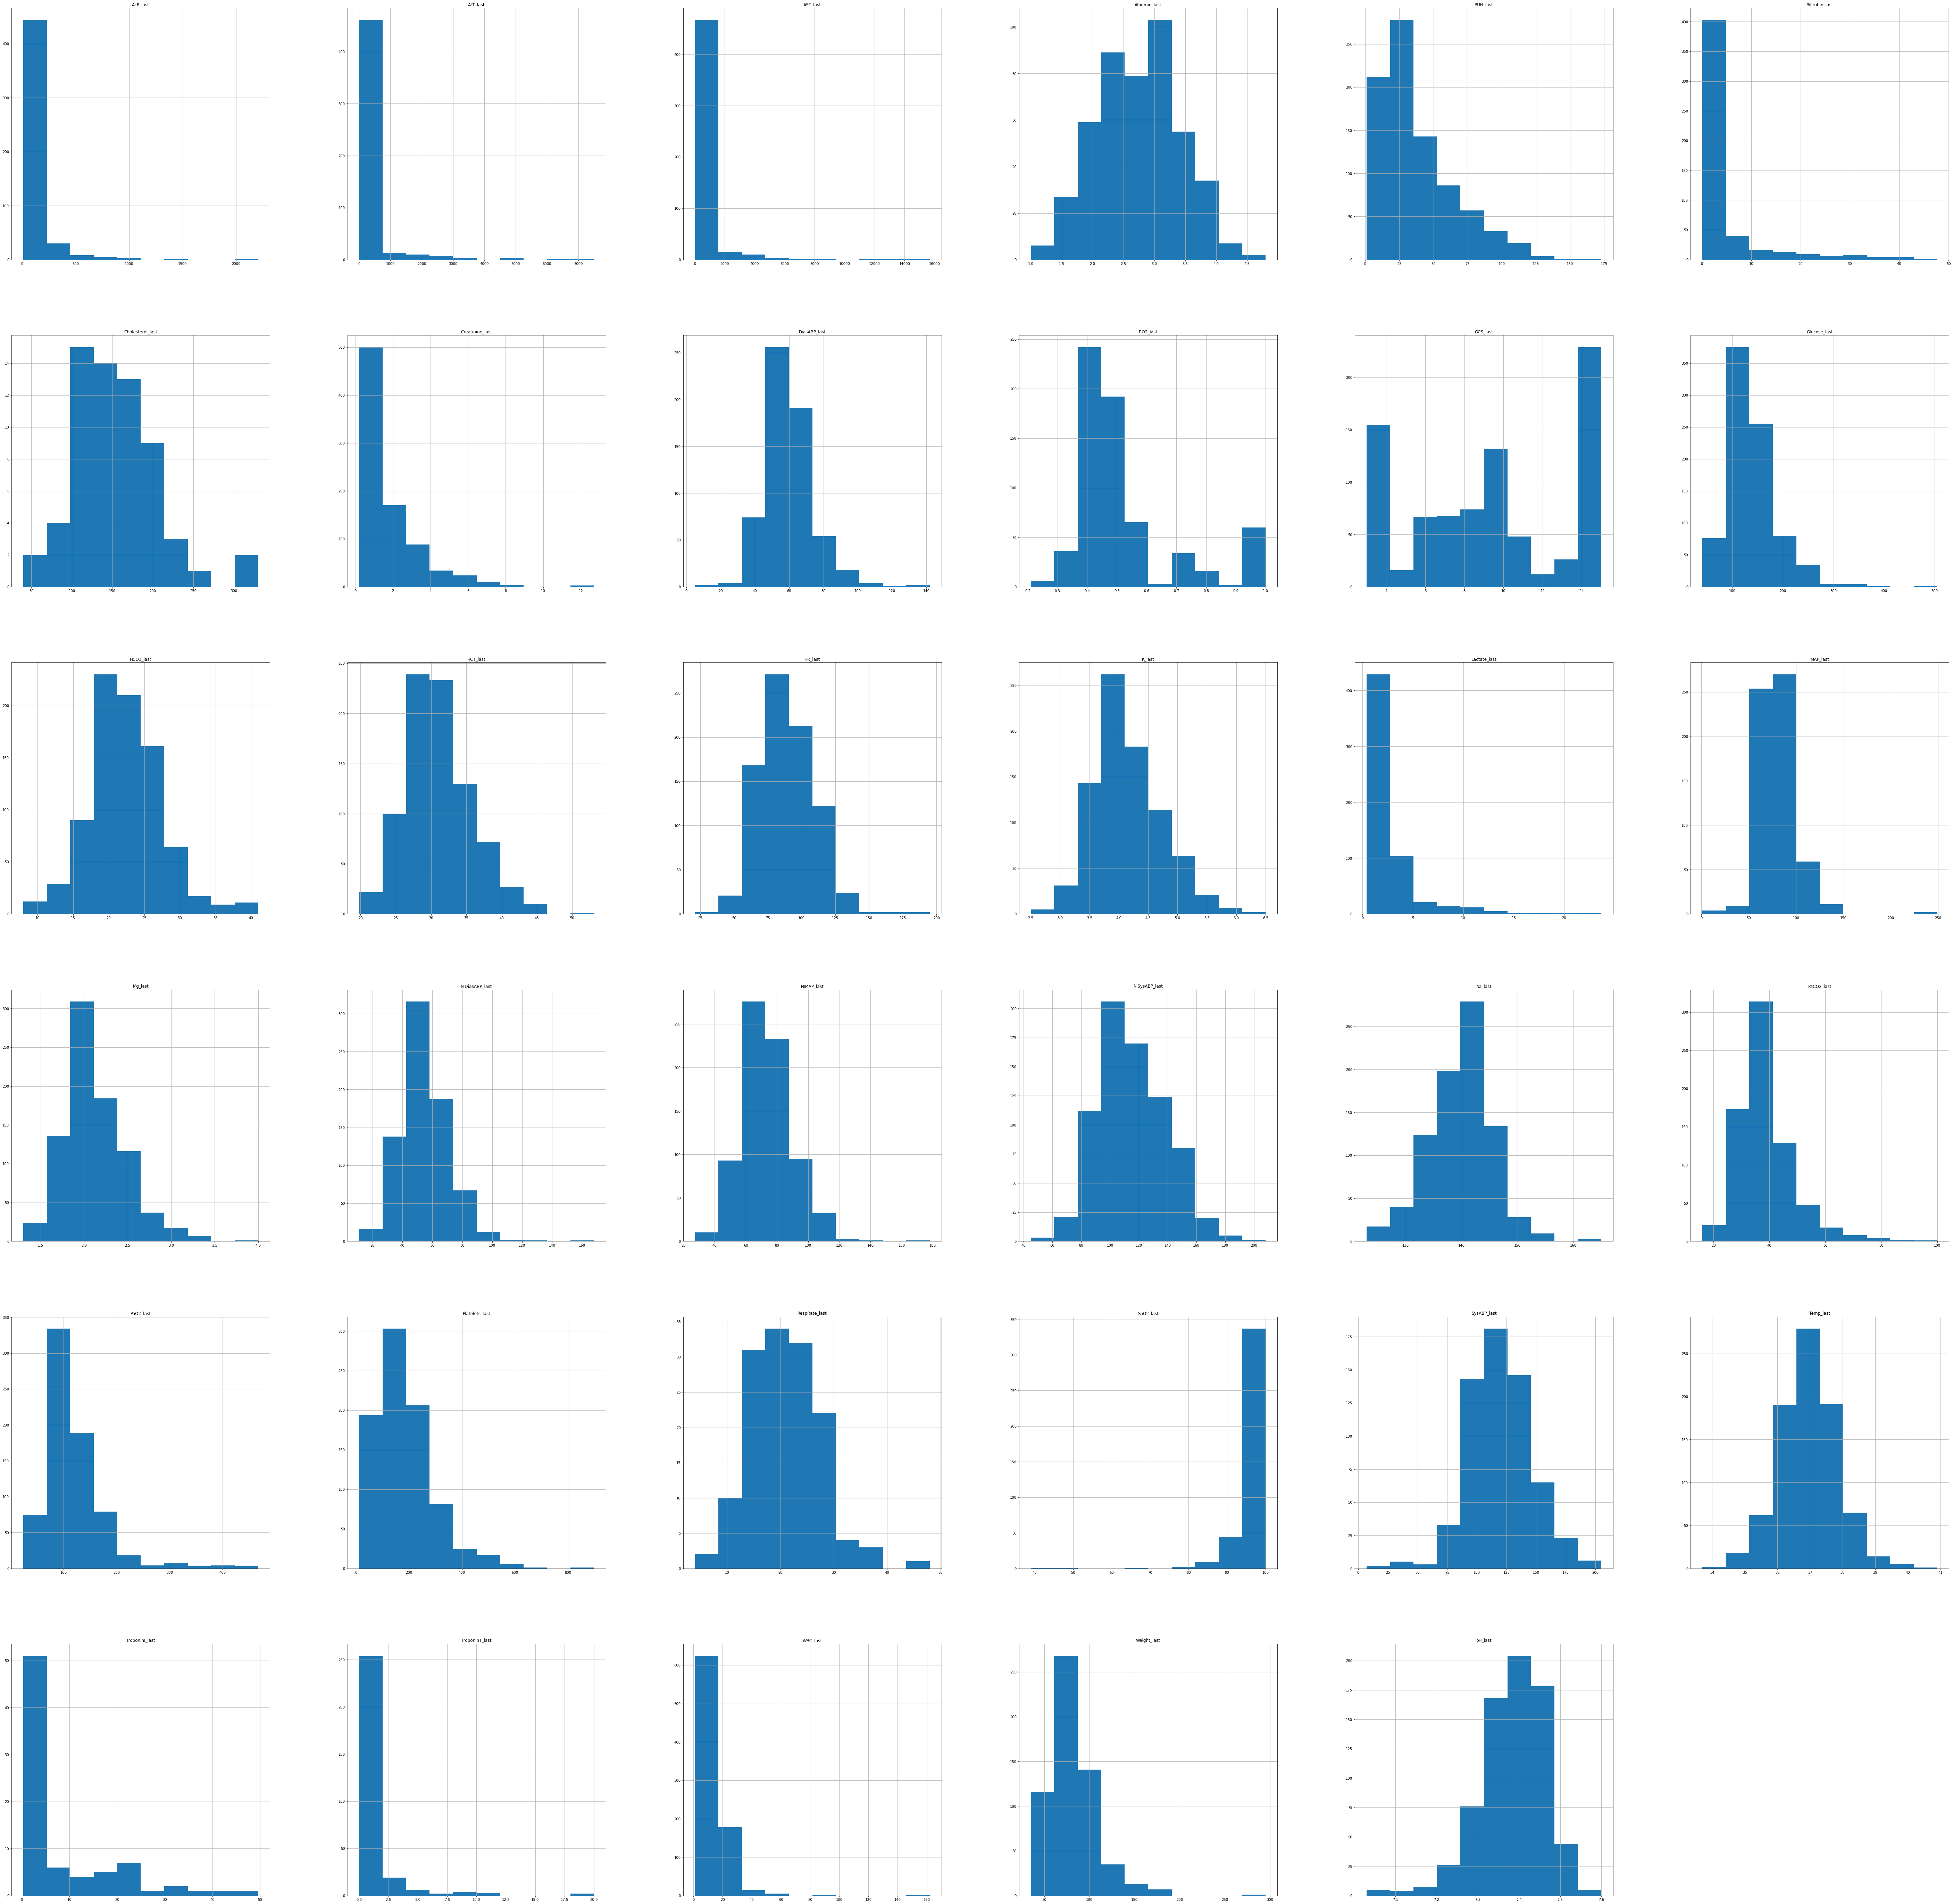

In [8]:
df_dead_last.hist(figsize=(100,100))

In [9]:
df.describe()#['DiasABP_last']

,recordid,SAPS-I,SOFA,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,...,Platelets_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.0000,5994.000000,3114.000000,5472.000000,6000.000000,6000.000000,...,5895.000000,285.000000,1334.000000,5861.000000,4049.000000,4522.000000,3744.000000,3744.000000,3744.000000,3744.000000
mean,140965.097167,14.170333,6.345500,0.139667,64.5685,0.562896,174.775374,81.332485,0.146333,0.212167,...,191.872757,7.167368,0.987181,12.238679,84.739590,7.399151,288.830395,1900.302885,0.616453,12.161859
std,5584.789346,6.085844,4.227187,0.346670,17.4803,0.496070,209.733813,23.520441,0.353470,0.408876,...,102.789242,10.588910,2.389819,6.462158,24.438082,0.060530,488.624745,874.063232,0.486315,5.825495
min,132539.000000,-1.000000,-1.000000,0.000000,15.0000,0.000000,121.900000,35.000000,0.000000,0.000000,...,10.000000,0.300000,0.010000,1.000000,35.000000,7.030000,0.000000,0.000000,0.000000,1.000000
25%,136368.750000,10.000000,3.000000,0.000000,53.0000,0.000000,162.600000,65.900000,0.000000,0.000000,...,123.000000,0.700000,0.040000,8.400000,68.100000,7.370000,54.000000,1148.750000,0.000000,7.000000
50%,140100.500000,15.000000,6.000000,0.000000,67.0000,1.000000,170.200000,78.000000,0.000000,0.000000,...,173.000000,1.800000,0.130000,11.100000,81.700000,7.410000,122.000000,2305.000000,1.000000,13.000000
75%,145114.500000,18.000000,9.000000,0.000000,78.0000,1.000000,177.800000,91.700000,0.000000,0.000000,...,235.000000,9.900000,0.717500,14.700000,97.000000,7.440000,248.000000,2660.250000,1.000000,16.000000
max,152864.000000,34.000000,22.000000,1.000000,90.0000,1.000000,11220.000000,295.000000,1.000000,1.000000,...,1064.000000,49.600000,24.040000,162.000000,295.000000,7.660000,2871.000000,2880.000000,1.000000,44.000000


Separation train/test

In [13]:
#approssima i NaN con 0
df = df.fillna('0')

X = df.drop(labels = 'In-hospital_death', axis = 'columns')
y = df['In-hospital_death']

In [ ]:
#normalizza i valori (?)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, 
                                                    stratify=y, 
                                                    random_state= 123)
print(X_train.shape, X_test.shape)


(4200, 120) (1800, 120)


In [15]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_test: ", f1_score(y_test, y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').